**Napisz funkcję umożliwiającą wyświetlanie dowolnej liczby obrazów.** W szczególności funkcja powinna realizować następujące zadania:

- wczytanie listy obrazów do wyświetlenia
- jako opcja, funkcja powinna również umożliwiać przypisanie do każdego obrazu jego tytułu, który potem zostanie wyświetlony nad obrazem
- obrazy powinny być wyświetlane jako macierz (tj. w wierszach i kolumnach)
- liczba wierszy powinna być argumentem funkcji
- liczba kolumn powinna być argumentem opcjonalnym (jeśli jest podana, powinna zostać wyliczona na podstawie liczby obrazów i liczby wierszy)
- funkcja powinna wyświetlać stadardowo obrazy w układzie składowych RGB
- jako opcja powinna przyjmować także obrazy w innych przestrzeniach kolorów, w tym także BGR (openCV)


In [98]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# przygotowanie danych
# ścieżki do obrazów
locations = ['./ADOM/baboon.jpg', './ADOM/blob.jpg', './ADOM/kalkulator.png', 
             './ADOM/dowels.png', './ADOM/building.png', './ADOM/lena.png',
             './ADOM/kodim01.png', './ADOM/kodim03.png', './ADOM/kodim20.png']

# tytuły obrazów 
titles = ['Baboon', 'Blob', 'Kalkulator', 'Dowels', 'Building', 'Lena', 'Kodim01', 'Kodim03', 'Kodim20']

titles2 = titles[0:3]

# załadowanie obrazów, dla uproszczenia wszystkie zostaną zmniejszone i przekształcone do (512, 512)
images = [cv2.resize(cv2.cvtColor(cv2.imread(location), cv2.COLOR_BGR2RGB), (512,512), interpolation = cv2.INTER_AREA) 
          for location in locations]

# różne rozmiary i inna przestrzeń barw
images2 = [cv2.imread(location) for location in locations[0:3]]

In [99]:
# kod funkcji
def plot_images(images, num_cols = 1, num_rows = None, titles = None):
    images_number = len(images)
    if num_rows == None:
        num_rows = np.ceil(images_number/num_cols)
    
    fig,axes = plt.subplots(ncols = int(num_cols),nrows = int(num_rows))
    axes = axes.flatten()
    fig.set_size_inches((15,15))
    fig.subplots_adjust(wspace = 0.1, hspace = 0.1)
    for i in range(0, int(num_cols*num_rows)):
        if i < images_number:
            axes[i].imshow(images[i])
            axes[i].axis('off')
            # dodanie tytułów jeśli jest taka potrzeba 
            if titles != None: axes[i].set_title(titles[i])
        # usunięcie wykresów które nie odpow    
        else:
            fig.delaxes(axes[i])

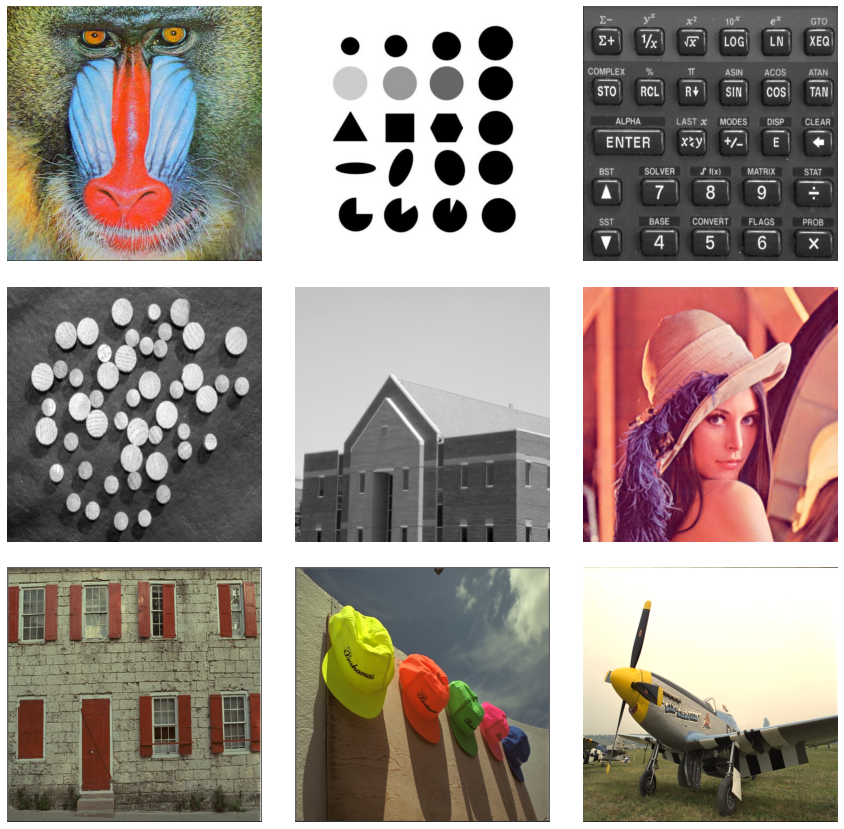

In [103]:
# kod demonstacyjny (zestaw parametrów 1)
plot_images(images, num_cols = 3, num_rows = None)

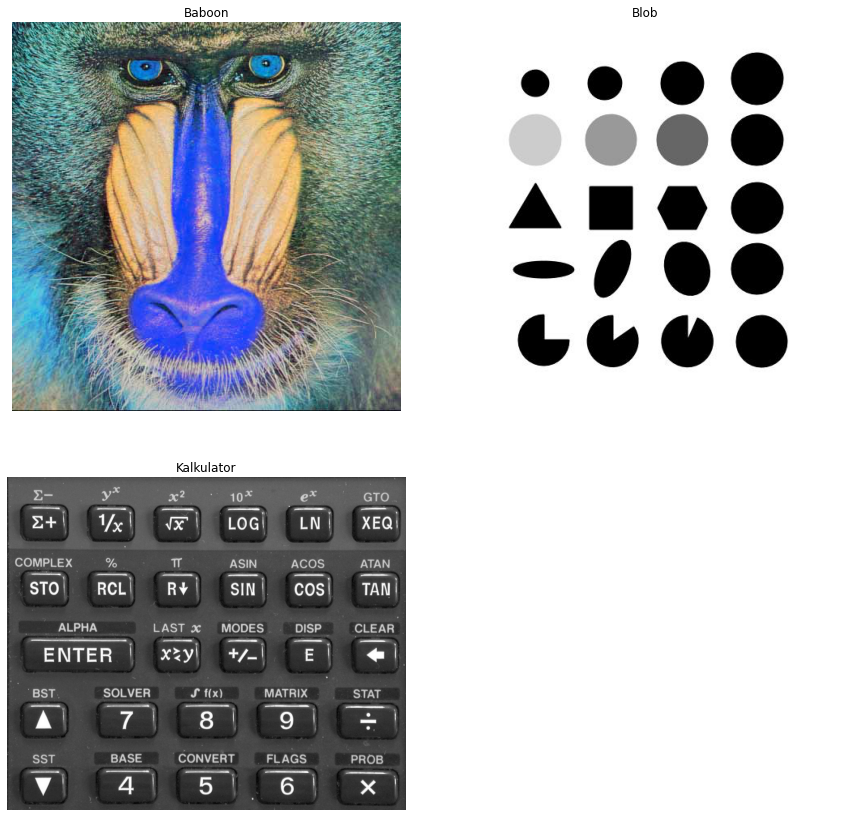

In [102]:
# kod demonstacyjny (zestaw parametrów 2)
plot_images(images2, num_cols = 2, num_rows = None, titles = titles2)